In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [74]:
import numpy as np
from pprint import pprint
import pandas as pd
from flask import Flask, jsonify

In [75]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [77]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [78]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [79]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [82]:
measurementDF = pd.read_sql("select * from Measurement", conn)
measurementDF.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [83]:
stationDF = pd.read_sql("select * from Station", conn)
stationDF.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

measurementDF2 = pd.read_sql("select date, prcp from Measurement where date between '2016-08-23' and '2017-08-23'", conn)
measurementDF2 = measurementDF2.set_index("date")
measurementDF2.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


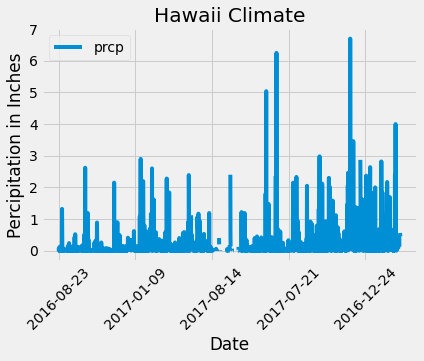

In [85]:
measurementDF2.plot(rot=45)
plt.xlabel("Date")
plt.ylabel("Percipitation in Inches")
plt.title("Hawaii Climate")
plt.savefig("Climate Analysis Bar")
plt.show()

In [86]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurementDF2.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [87]:
# Design a query to show how many stations are available in this dataset?
stationDF["station"].count()

9

In [88]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
measurementDF["station"].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
measurementDF["tobs"].loc[measurementDF["station"]=="USC00519281"].min()

54.0

In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
measurementDF["tobs"].loc[measurementDF["station"]=="USC00519281"].max()

85.0

In [91]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
measurementDF["tobs"].loc[measurementDF["station"]=="USC00519281"].mean()

71.66378066378067

In [92]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
measurementDF3 = pd.read_sql("select station, tobs from Measurement", conn)

In [93]:
tobsStation = measurementDF3.groupby("station").count()["tobs"]

In [94]:
measurementDF4 = pd.DataFrame(tobsStation)
measurementDF4

,tobs
station,
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


In [95]:
highStation = pd.read_sql("select date, tobs from Measurement where station = 'USC00519281' and date between '2016-08-23' and '2017-08-23'", conn)
highStation.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


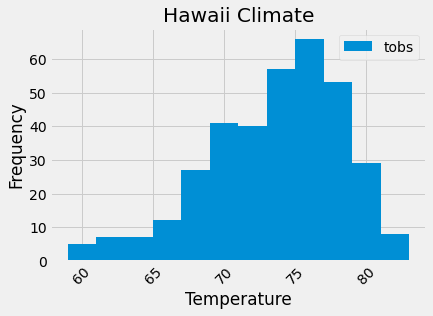

In [96]:
highStation.plot.hist(bins=12, rot=45)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Hawaii Climate")
plt.savefig("Station Analysis Histogram")
plt.show()

In [97]:
session.close()

In [ ]:
import datetime as dt

import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from flask import Flask, jsonify


# Database Setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite",connect_args={'check_same_thread': False} )

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)


# FLASK SETUP

app = Flask(__name__)



# FLASK ROUTES


@app.route("/")
def welcome():
    return (
        f"Welcome to the Hawaii Climate Analysis API!<br/>"
        f"Available Routes:<br/>"
        f"api/v1.0/precipitation<br/>"
        f"api/v1.0/stations<br/>"
        f"api/v1.0/tobs<br/>"
        f"api/v1.0/temp/start/end"
    )

@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return the precipitation data for the last year"""
    # Calculate the date 1 year ago from the last data point in the database
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    
    # Perform a query to retrieve the data and precipitation scores
    precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
               
    # Dict with date as the key and prcp as the value
    precip = {date: prcp for date, prcp in precipitation}
    return jsonify(precip)

@app.route("/api/v1.0/stations")
def stations():
    """Return a list of stations"""
    results = session.query(Station.station).all()
               
# Unravel results into a 1D array and convert to a list
    stations = list(np.ravel(results))
    return jsonify(stations=stations)
               
               

@app.route("/api/v1.0/tobs")
def temp_monthly():
    """Return the temperature observations (tobs) for previous year"""
# Calculate the date 1 year ago from last date in database
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
               
# Query the primary station for all tobs from the last year
    results = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= prev_year).all()
               
# Unravel results into a 1D array and convert to a list
    temps = list(np.ravel(results))
               
# Return the results
    return jsonify(temps=temps)
               

               
@app.route("/api/v1.0/temp/<start>")
@app.route("/api/v1.0/temp/<start>/<end>")
def stats(start=None, end=None):
    """Return TMIN, TAVG, TMAX"""
    if start is not None:
        formatdatestart=dt.datetime.strptime(start, "%m%d%Y")             
    if end is not None:
        formatdateend=dt.datetime.strptime(end, "%m%d%Y")
# Select statement
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    if not end:
# calculate TMIN, TAVG, TMAX for dates greater than start
        results = session.query(*sel).\
            filter(Measurement.date >= formatdatestart).all()
# Unravel results into a 1D array and convert to a list
        temps = list(np.ravel(results))
        return jsonify(temps)
               
     # calculate TMIN, TAVG, TMAX with start and stop
    results = session.query(*sel).\
        filter(Measurement.date >= formatdatestart).\
        filter(Measurement.date <= formatdateend).all()
    # Unravel results into a 1D array and convert to a list
    temps = list(np.ravel(results))
    


    return jsonify(temps=temps)
               
               
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
